In [55]:
import numpy as np
%pip install plotly==5.8.0
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from google.colab import files
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

In [56]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### **DATA UNDERSTANDING AND PREPARATION**

In [57]:
df = pd.read_csv('/content/drive/MyDrive/EV_market_dataset.csv')

df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8000,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5000,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [58]:
df.tail()                              # it gives last 5 rows of dataset

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,98,Nissan,Ariya 63kWh,7.5000,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,99,Audi,e-tron S Sportback 55 quattro,4.5000,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,100,Nissan,Ariya e-4ORCE 63kWh,5.9000,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1000,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,102,Byton,M-Byte 95 kWh 2WD,7.5000,190,400,238,480,No,AWD,Type 2 CCS,SUV,E,5,62000


In [59]:
df.shape                              # it gives number of rows and columns

(103, 15)

In [60]:
df.info()                            # it gives data type and non_null count of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


In [61]:
df.describe()                   # it give statistical information about numerical values

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,51.0000,7.3961,179.1942,338.7864,189.1650,444.2718,4.8835,55811.5631
std,29.8775,3.0174,43.5730,126.0144,29.5668,203.9493,0.7958,34134.6653
min,0.0000,2.1000,123.0000,95.0000,104.0000,170.0000,2.0000,20129.0000
25%,25.5000,5.1000,150.0000,250.0000,168.0000,260.0000,5.0000,34429.5000
50%,51.0000,7.3000,160.0000,340.0000,180.0000,440.0000,5.0000,45000.0000
75%,76.5000,9.0000,200.0000,400.0000,203.0000,555.0000,5.0000,65000.0000
max,102.0000,22.4000,410.0000,970.0000,273.0000,940.0000,7.0000,215000.0000


In [62]:
df.describe(include="O")                          # it give some information about categorical columns

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
count,103,103,103,103,103,103,103
unique,33,102,2,3,4,9,8
top,Tesla,e-Soul 64 kWh,Yes,AWD,Type 2 CCS,SUV,C
freq,13,2,77,41,90,45,30


In [63]:
                                                     # drop  unnecessary index column
df = df.loc[:, df.columns != 'Unnamed: 0']
                                                     # Add a new column for INR conversion
df['inr(10e3)'] = df['PriceEuro'] * 0.08320

                                                     # Replace 'Yes' and 'No' in RapidCharge with 1 and 0
df['RapidCharge'] = df['RapidCharge'].replace({'No': 0, 'Yes': 1})


In [64]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


In [65]:
df[(df['Brand'] == 'Tesla ') | (df['Brand'] == 'BMW ')]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
8,Tesla,Model 3 Standard Range Plus,5.6000,225,310,153,650,1,RWD,Type 2 CCS,Sedan,D,5,46380,3858.8160
13,BMW,i4,4.0000,200,450,178,650,1,RWD,Type 2 CCS,Sedan,D,5,65000,5408.0000
21,Tesla,Model Y Long Range Dual Motor,5.1000,217,425,171,930,1,AWD,Type 2 CCS,SUV,D,7,58620,4877.1840
24,Tesla,Model 3 Long Range Performance,3.4000,261,435,167,910,1,AWD,Type 2 CCS,Sedan,D,5,61480,5115.1360
28,BMW,i3 120 Ah,7.3000,150,235,161,270,0,RWD,Type 2 CCS,Hatchback,B,4,38017,3163.0144
33,Tesla,Cybertruck Tri Motor,3.0000,210,750,267,710,1,AWD,Type 2 CCS,Pickup,N,6,75000,6240.0000
40,Tesla,Model S Long Range,3.8000,250,515,184,560,1,AWD,Type 2,Liftback,F,5,79990,6655.1680
51,Tesla,Roadster,2.1000,410,970,206,920,1,AWD,Type 2 CCS,Cabrio,S,4,215000,17888.0000


In [66]:
df.isnull().sum()                # Checking if the dataset has any null values in it

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


We can observe that there is no null values in the dataset


In [67]:
df[df.duplicated()]                    #This line shows that we are checking for the duplicated rows in the dataset

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)


There are no duplicate rows in this data set

Change Data Types

In [68]:
# Convert categorical columns to string
df['Brand'] = df['Brand'].astype('string')
df['Model'] = df['Model'].astype('string')
df['RapidCharge'] = df['RapidCharge'].astype('string')
df['PowerTrain'] = df['PowerTrain'].astype('string')
df['PlugType'] = df['PlugType'].astype('string')
df['BodyStyle'] = df['BodyStyle'].astype('string')
df['Segment'] = df['Segment'].astype('string')

# Convert numeric columns to appropriate types
df['AccelSec'] = df['AccelSec'].astype('float')
df['TopSpeed_KmH'] = df['TopSpeed_KmH'].astype('int')
df['Range_Km'] = df['Range_Km'].astype('int')
df['Efficiency_WhKm'] = df['Efficiency_WhKm'].astype('int')
df['FastCharge_KmH'] = df['FastCharge_KmH'].astype('int')
df['Seats'] = df['Seats'].astype('int')
df['PriceEuro'] = df['PriceEuro'].astype('int')


**Correlation Between Numerical Variables**

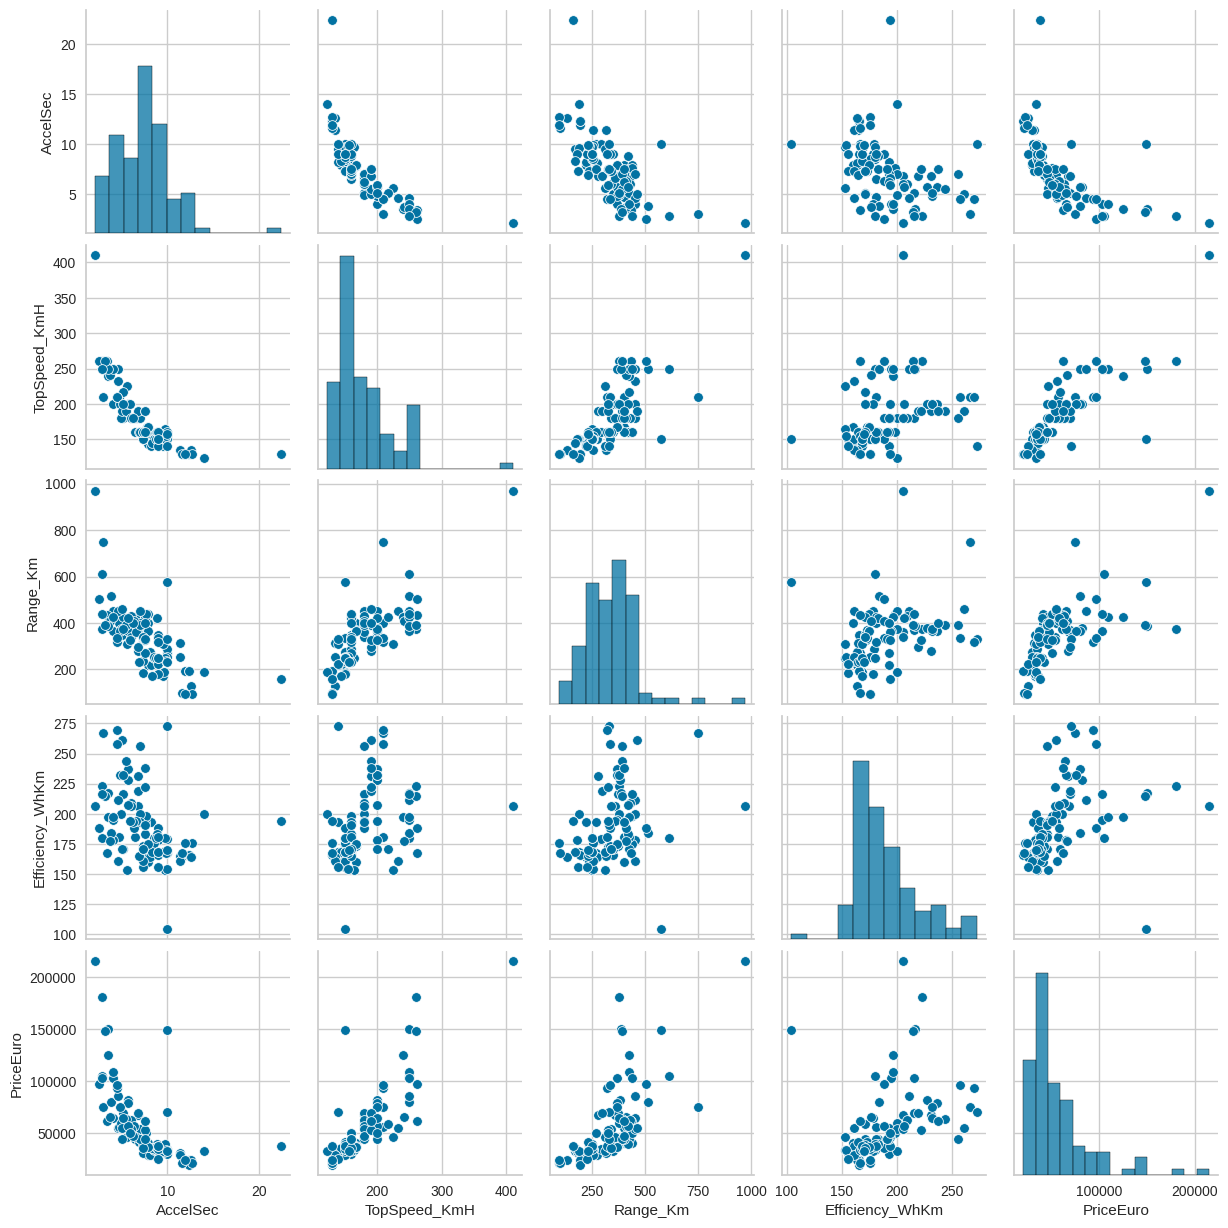

In [69]:
# Pairplot for numerical columns
sns.pairplot(df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro']])
plt.show()


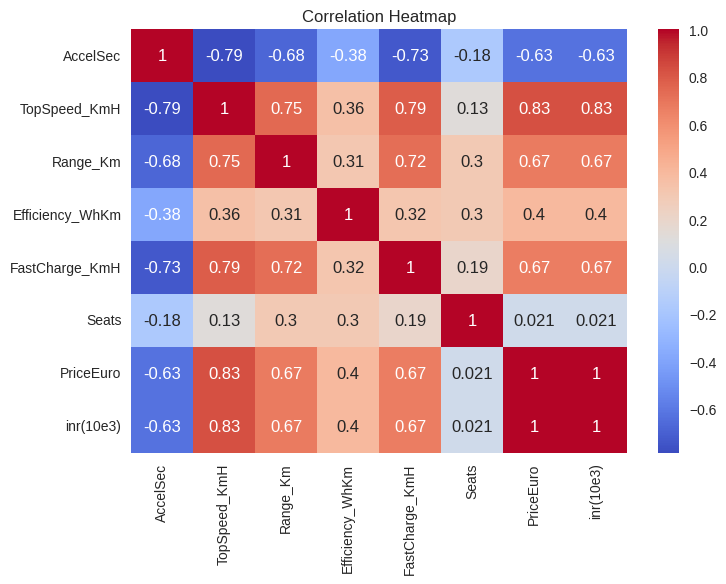

In [70]:
# Heatmap for correlation
corr = df.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation calculation
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Comparison of Categories**

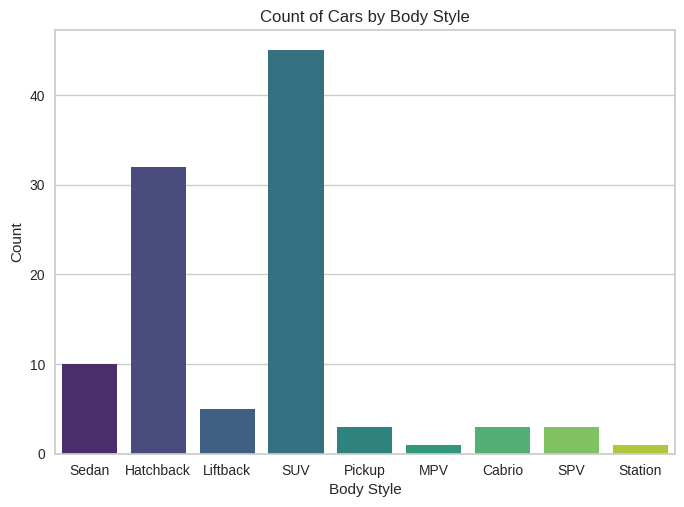

In [71]:
# Countplot for BodyStyle
sns.countplot(x='BodyStyle', data=df, palette='viridis')
plt.title('Count of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()



SUVs Lead the Market: The countplot shows that SUVs are the most common body style, reflecting their popularity and strong consumer demand.
Limited Demand for MPVs: MPVs are the least represented, indicating a smaller market or reduced production focus for this body style.
Market Insights: The contrast between SUVs and MPVs highlights a clear preference for spacious, versatile vehicles, guiding manufacturers to prioritize SUV production and marketing.

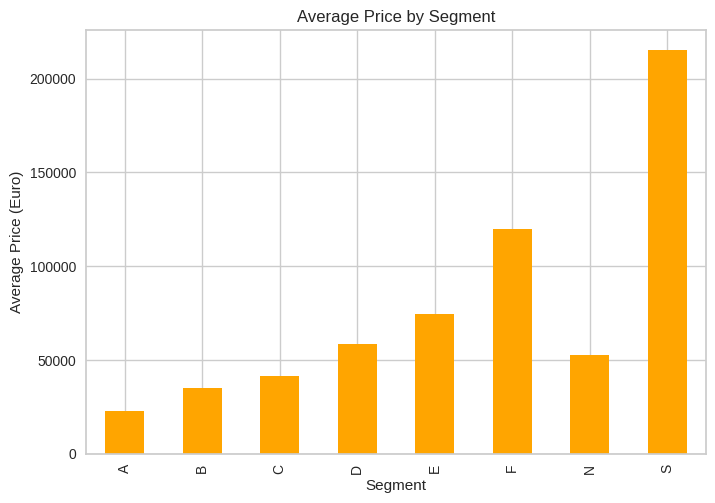

In [72]:
# Bar chart for average Price by Segment
df.groupby('Segment')['PriceEuro'].mean().plot(kind='bar', color='orange')
plt.title('Average Price by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Price (Euro)')
plt.show()




*   Segment S Leads in Price: The bar chart shows that Segment S has the highest average price, indicating premium or luxury offerings in this category.
*  Segment A at the Lowest: Segment A has the lowest average price, reflecting its focus on budget-friendly or entry-level vehicles.

*   Price Variation by Segment: The distinct price differences between segments highlight a clear stratification of market offerings, catering to diverse consumer groups based on affordability and preferences.






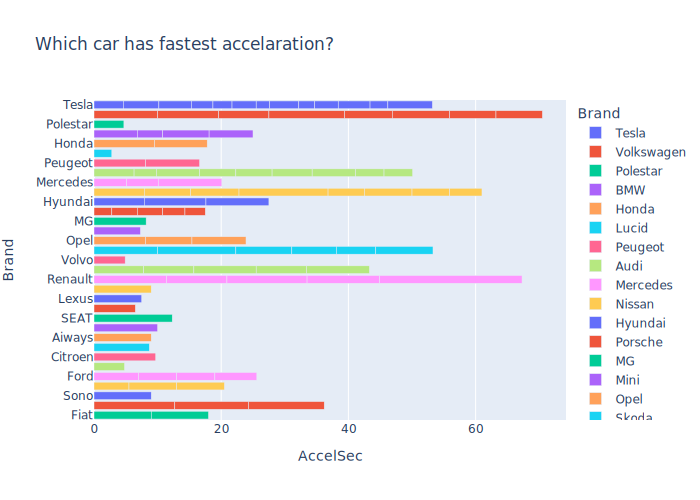

In [73]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)





*   Volkswagen Dominates in Acceleration: The bar chart reveals that Volkswagen leads in acceleration performance, making it a standout brand for speed enthusiasts.
*   Brand Performance Insights: Other brands show varying levels of acceleration, but none match Volkswagen’s prominence, highlighting its engineering focus on speed.

*   Consumer Appeal: Volkswagen’s superior acceleration may appeal to customers seeking vehicles with better performance and quick responsiveness.







**Distribution of Categorical Variables**

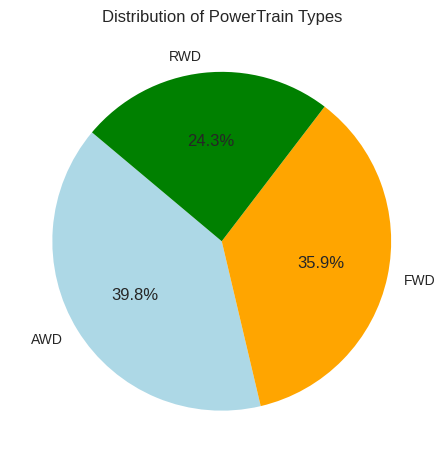

In [74]:
# Pie chart for PowerTrain
df['PowerTrain'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'green'])
plt.title('Distribution of PowerTrain Types')
plt.ylabel('')  # Remove default y-label
plt.show()




*   AWD Dominates: The pie chart shows that All-Wheel Drive (AWD) vehicles make up 38.9% of the distribution, highlighting their popularity among consumers for better traction and performance.
*   FWD and RWD Share: Front-Wheel Drive (FWD) follows closely with 35.9%, while Rear-Wheel Drive (RWD) accounts for 24.3%, indicating a balanced preference for different drivetrain types based on functionality and driving conditions.

*   Consumer Preferences: The distribution reflects diverse consumer needs, with AWD preferred for versatility, FWD for efficiency, and RWD for performance-focused driving.






**Relationship Between Two Variables**

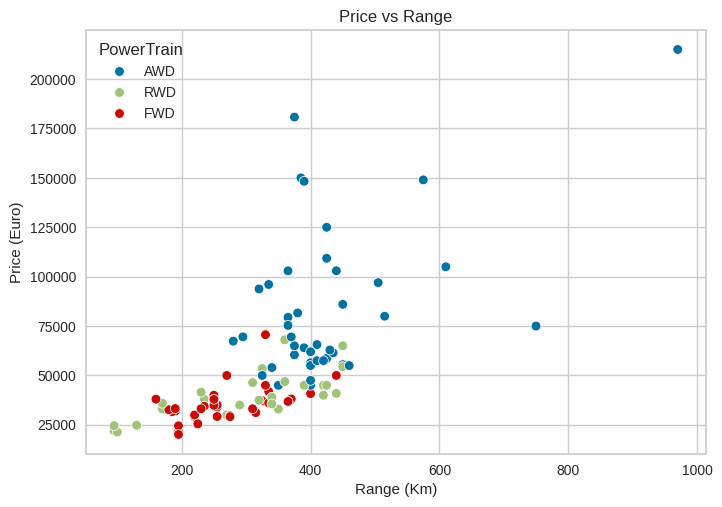

In [75]:
# Scatter plot for Range vs Price
sns.scatterplot(x='Range_Km', y='PriceEuro', hue='PowerTrain', data=df)
plt.title('Price vs Range')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.show()


 **Efficiency Analysis**

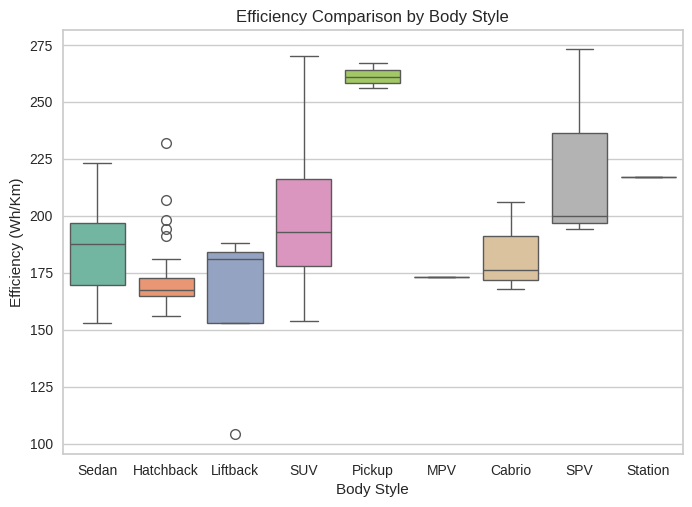

In [76]:
# Boxplot for Efficiency by BodyStyle
sns.boxplot(x='BodyStyle', y='Efficiency_WhKm', data=df, palette='Set2')
plt.title('Efficiency Comparison by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Efficiency (Wh/Km)')
plt.show()


**Time-Based Insights**

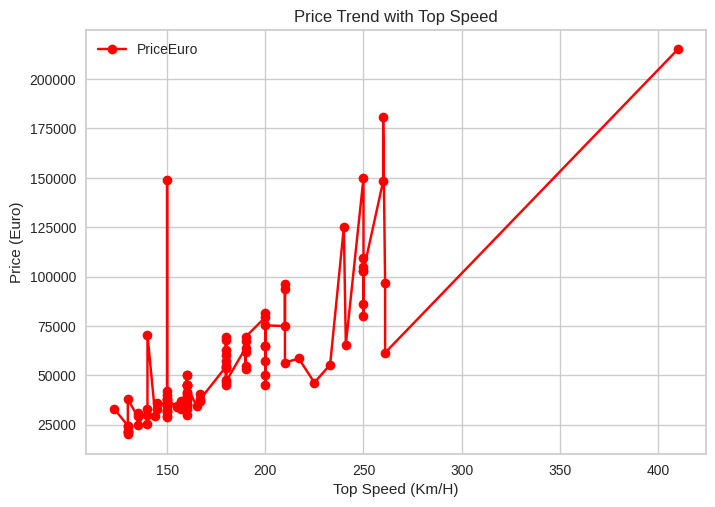

In [77]:
# Line chart for Price vs TopSpeed
df.sort_values(by='TopSpeed_KmH').plot(x='TopSpeed_KmH', y='PriceEuro', kind='line', marker='o', color='red')
plt.title('Price Trend with Top Speed')
plt.xlabel('Top Speed (Km/H)')
plt.ylabel('Price (Euro)')
plt.show()


**Multi-Dimensional Insight**

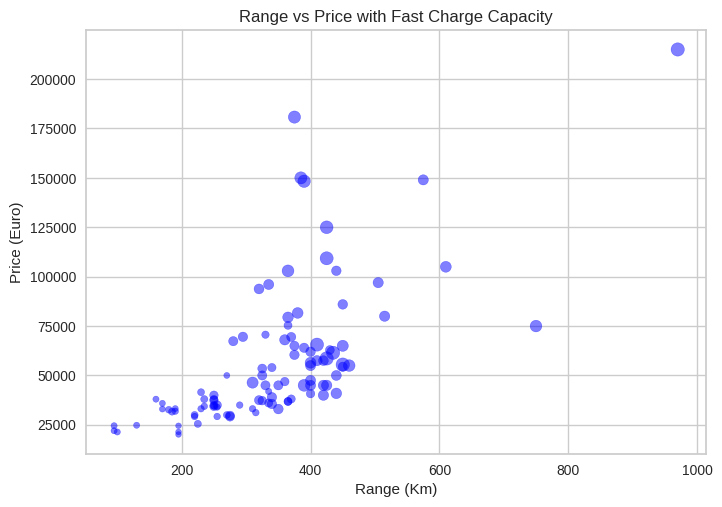

In [78]:
# Bubble Chart for Range vs Price with FastCharge as Size
plt.scatter(df['Range_Km'], df['PriceEuro'], s=df['FastCharge_KmH']*0.1, alpha=0.5, c='blue')
plt.title('Range vs Price with Fast Charge Capacity')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.show()


**Top 5 Cars by Price**

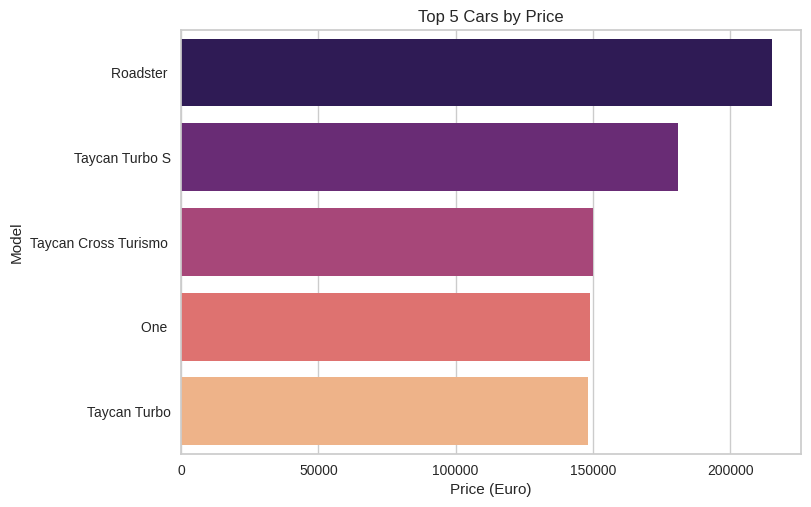

In [79]:
# Top 5 Cars by Price
top_cars = df.nlargest(5, 'PriceEuro')
sns.barplot(x='PriceEuro', y='Model', data=top_cars, palette='magma')
plt.title('Top 5 Cars by Price')
plt.xlabel('Price (Euro)')
plt.ylabel('Model')
plt.show()




*   Premium Brands Lead: The top 5 brands  Roadster,Taycan Turbo S, Taycan Cross Turismo ,one,Taycan Turbo dominate the list of most expensive cars, reflecting their focus on luxury and high-performance vehicles.
*   Market Leadership: These brands set themselves apart in the industry by offering premium features and targeting affluent customer segments.

*   High-Value Proposition: The top brands’ pricing strategy showcases their commitment to quality, innovation, and exclusivity in their offerings.






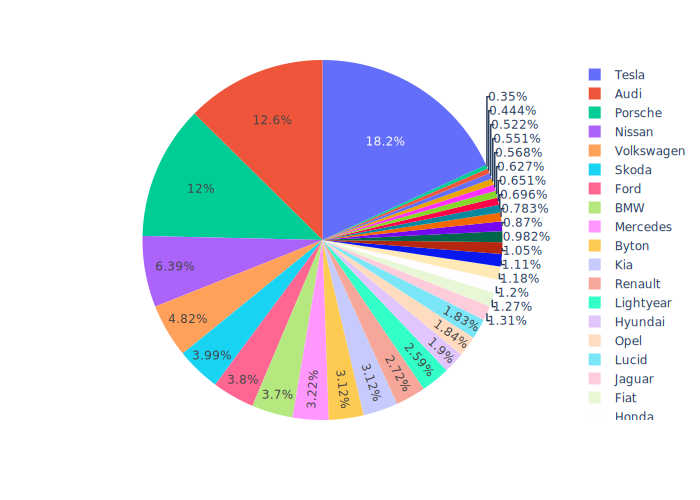

In [80]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

**Top speeds achieved by the cars of a brand**

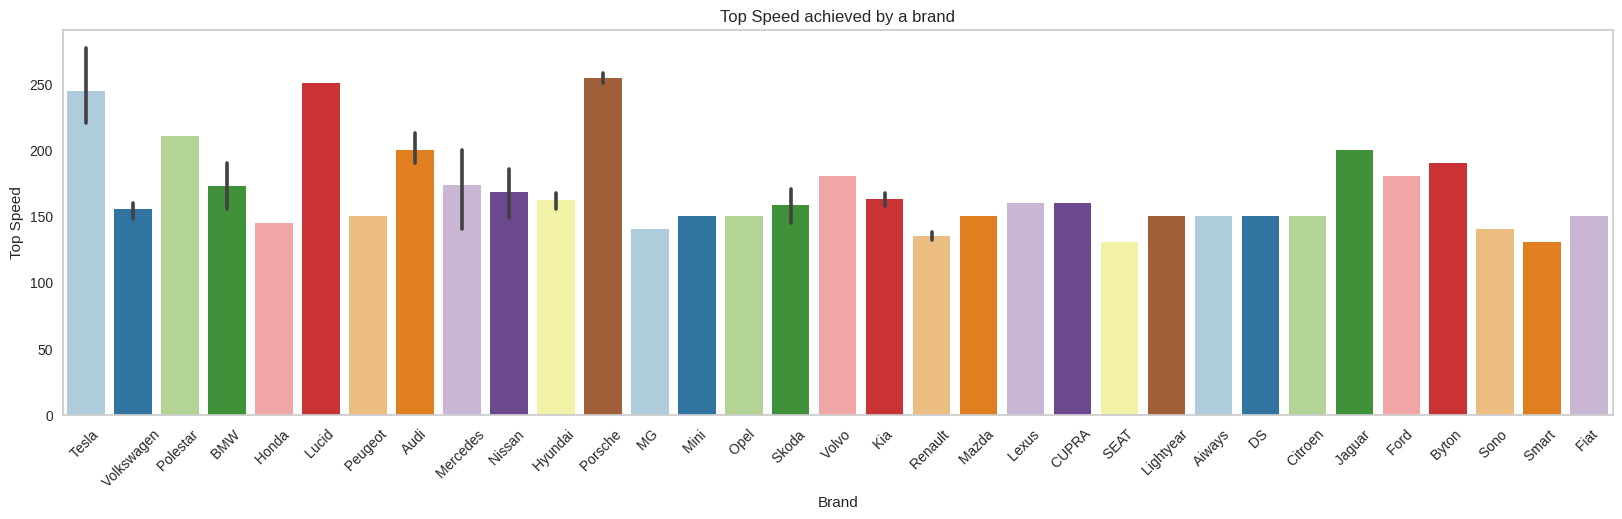

In [84]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

**Number of seats in each car**

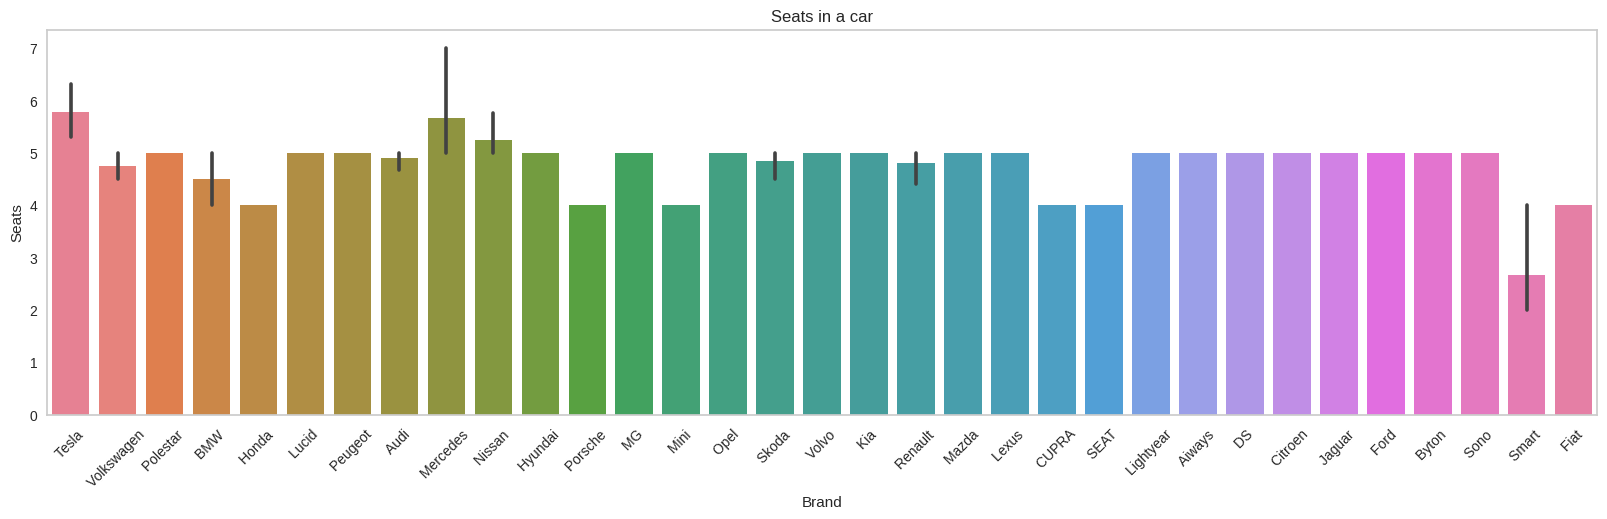

In [86]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)
plt.show()

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

**Type of Plug used for charging**

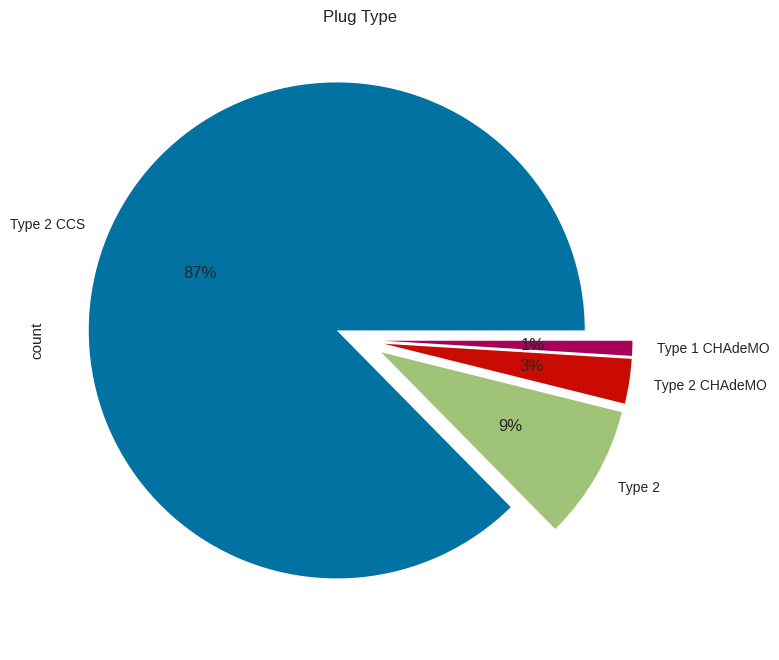

In [87]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')
plt.show()

Most companies use Type 2 CCS and Type 1 CHAdeMo the least

In [88]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


# **Regression  model**

In [90]:
# Convert 'PowerTrain' back to object type to allow mixed types
df['PowerTrain'] = df['PowerTrain'].astype(object)

# Now you can replace string values with integers
df['PowerTrain'].replace(to_replace=['RWD', 'AWD', 'FWD'], value=[0, 2, 1], inplace=True)

## Finding out the linear regression using OLS method

In [93]:
# Convert 'RapidCharge' to integers (0 and 1)
df['RapidCharge'] = df['RapidCharge'].astype(int)

# Define independent and dependent variables
x = df[['AccelSec', 'Range_Km', 'TopSpeed_KmH', 'Efficiency_WhKm', 'RapidCharge', 'PowerTrain']]
y = df['PriceEuro']

# Add a constant to the independent variables
x = sm.add_constant(x)

# Perform OLS regression
results = sm.OLS(y, x).fit()  # Fit the model to get results

print(results.summary()) # Print model summary

                            OLS Regression Results                            
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.57e-24
Time:                        14:54:36   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.031e+05   2.38e+04     

Notes:

1.Standard Errors assume that the covariance matrix of the errors is correctly specified.

2.The condition number is large, 5.53e+03. This might indicate that there are strong multicollinearity or other numerical problems.


Only Top Speed and Efficieny are the two variables related to price

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=365)

In [95]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

**Finding out the R-squared value**

In [96]:
r2=(r2_score(y_test,pred))
print(r2*100)

78.77072380232661


Around 78% of the dependant variable has been explained by the independant variables

In [97]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [98]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [99]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [100]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[ 0,  6],
       [ 0, 15]])

# Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

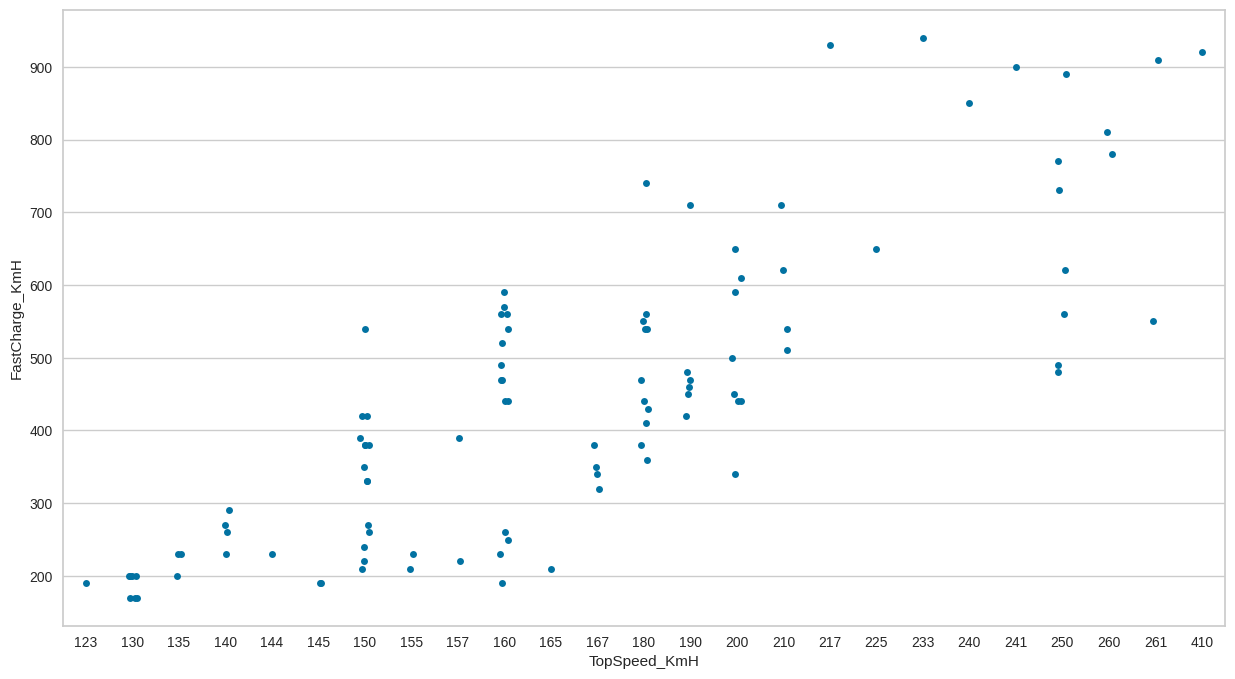

In [102]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

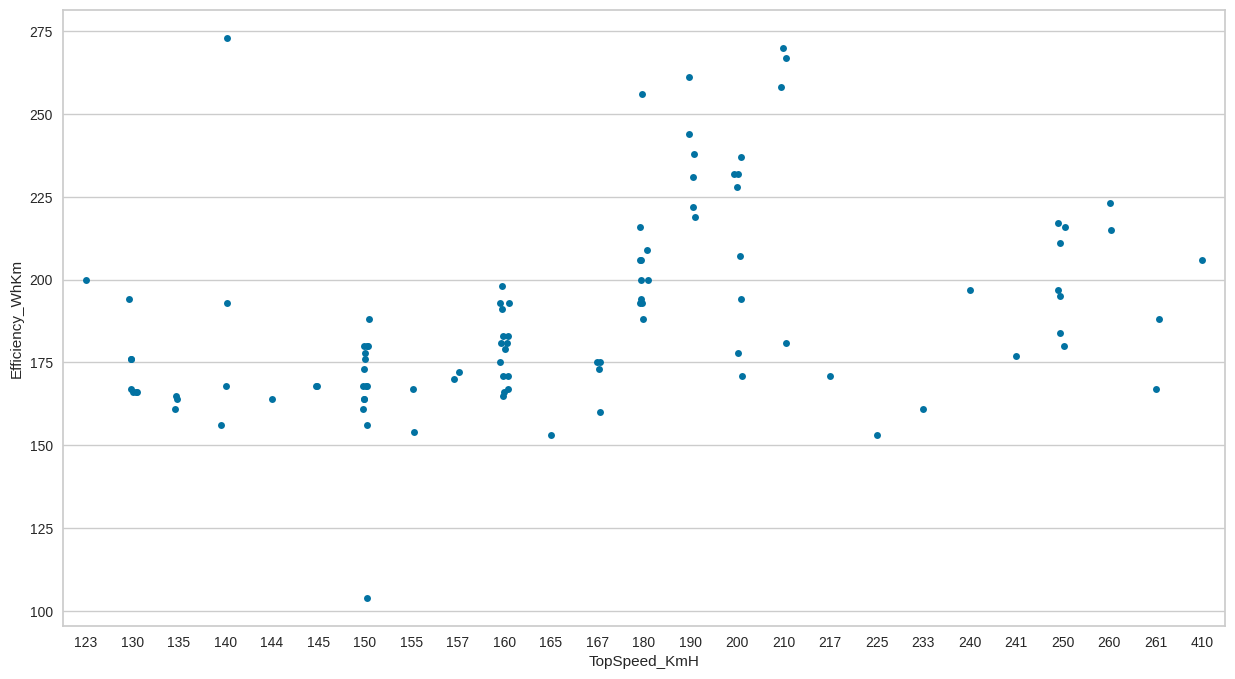

In [103]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [104]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [105]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.4292,-0.5546,1.1478,-0.8828,0.8400,-0.9593,0.9989,0.7111,0.3967
1,-2.3225,-0.3454,-0.8965,-1.3055,0.0796,0.2351,-0.2137,-0.5441,0.1819
2,1.5879,0.0089,0.6505,0.0410,0.5935,-0.6982,0.0587,0.2488,0.2028
3,0.2910,-0.0001,0.3077,-0.5142,-1.6089,0.2916,0.3650,-0.2355,-0.2617
4,-2.6027,-0.6265,0.8881,0.5853,-0.8021,0.0274,-0.0850,-0.5078,0.0499
...,...,...,...,...,...,...,...,...,...
98,-0.2972,0.4467,0.4636,0.1025,-0.3460,-0.1005,0.0311,0.2023,-0.1454
99,2.3350,0.6307,-0.9859,1.5601,-0.8173,-0.1219,0.1641,-0.2557,-0.1410
100,0.7806,0.4268,0.2986,0.7086,0.4817,-0.5401,-0.1398,-0.0487,0.3675
101,1.5409,0.6988,-0.4224,1.0949,-0.2981,-0.3080,-0.3632,0.1273,0.1904


In [106]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.4292,-0.5546,1.1478,-0.8828,0.8400,-0.9593,0.9989,0.7111,0.3967
1,-2.3225,-0.3454,-0.8965,-1.3055,0.0796,0.2351,-0.2137,-0.5441,0.1819
2,1.5879,0.0089,0.6505,0.0410,0.5935,-0.6982,0.0587,0.2488,0.2028


In [108]:
# correlation coefficient between original variables and the component
loadings = pca.components_
# Get the number of features from the shape of the components
num_pc = pca.components_.shape[1]  # Changed line to get n_features from components shape
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.3964,0.0862,-0.0648,0.0583,0.1445,0.6769,0.4125,0.2707,0.3246
PC2,0.4220,-0.2168,-0.0023,-0.0685,0.0382,0.0452,0.0376,-0.4138,0.7708
PC3,0.2383,0.3309,-0.5718,0.3805,-0.5751,0.0249,0.0047,0.1442,0.0990
PC4,0.3945,-0.1384,0.0477,-0.2965,-0.0924,-0.2379,0.7282,0.3584,-0.1057
Pc5,0.1572,0.2699,0.8033,0.3953,-0.2926,0.0870,0.0539,0.0408,0.0561
PC6,0.3895,-0.0247,0.0763,-0.3871,-0.0328,0.3645,-0.5208,0.5342,0.0380
PC7,0.1404,0.8013,-0.0195,-0.4290,0.1653,0.0867,0.0984,-0.3208,-0.0800
PC8,0.3898,-0.2623,-0.0738,0.1799,0.0433,0.5587,0.1180,-0.3821,-0.5172
PC9,0.3229,0.1805,-0.0983,0.4866,0.7228,-0.1499,-0.0191,0.2653,0.0333


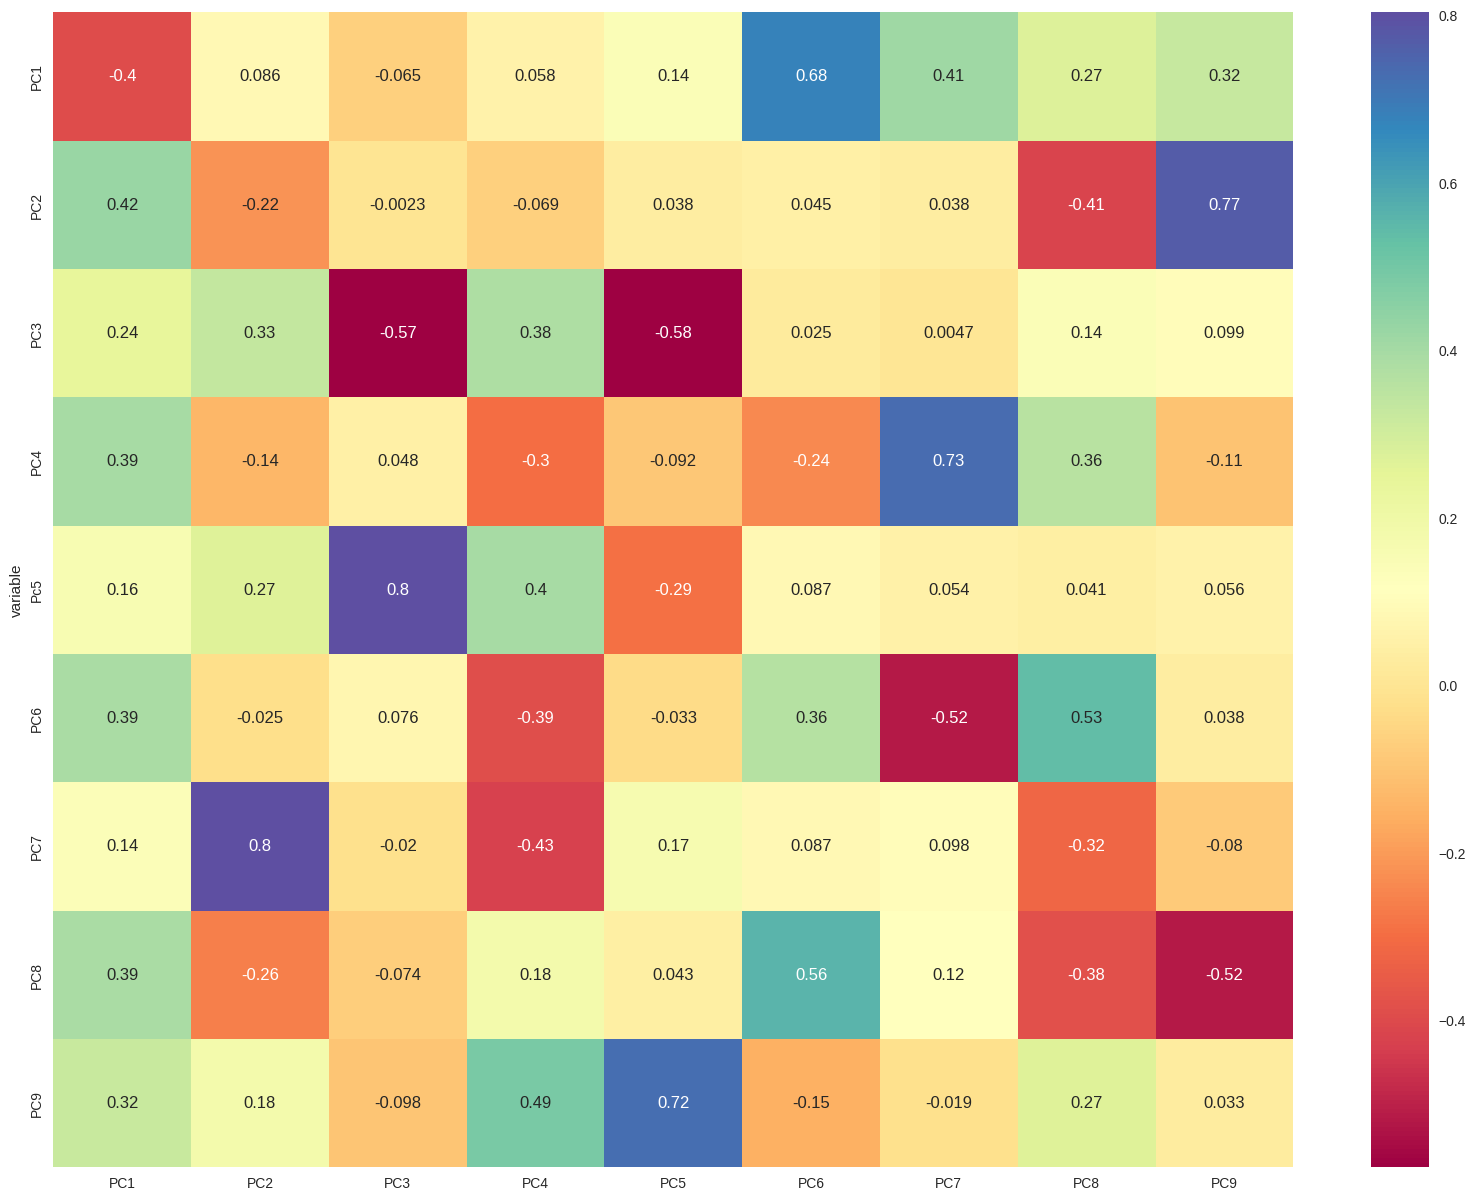

In [110]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

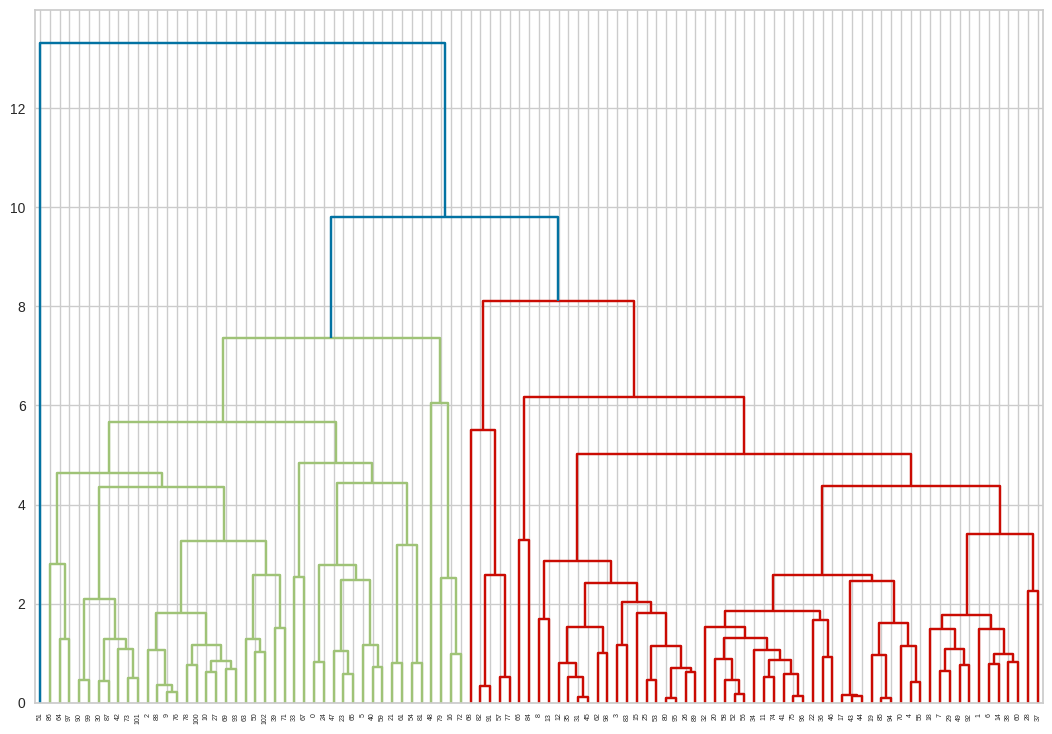

In [111]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

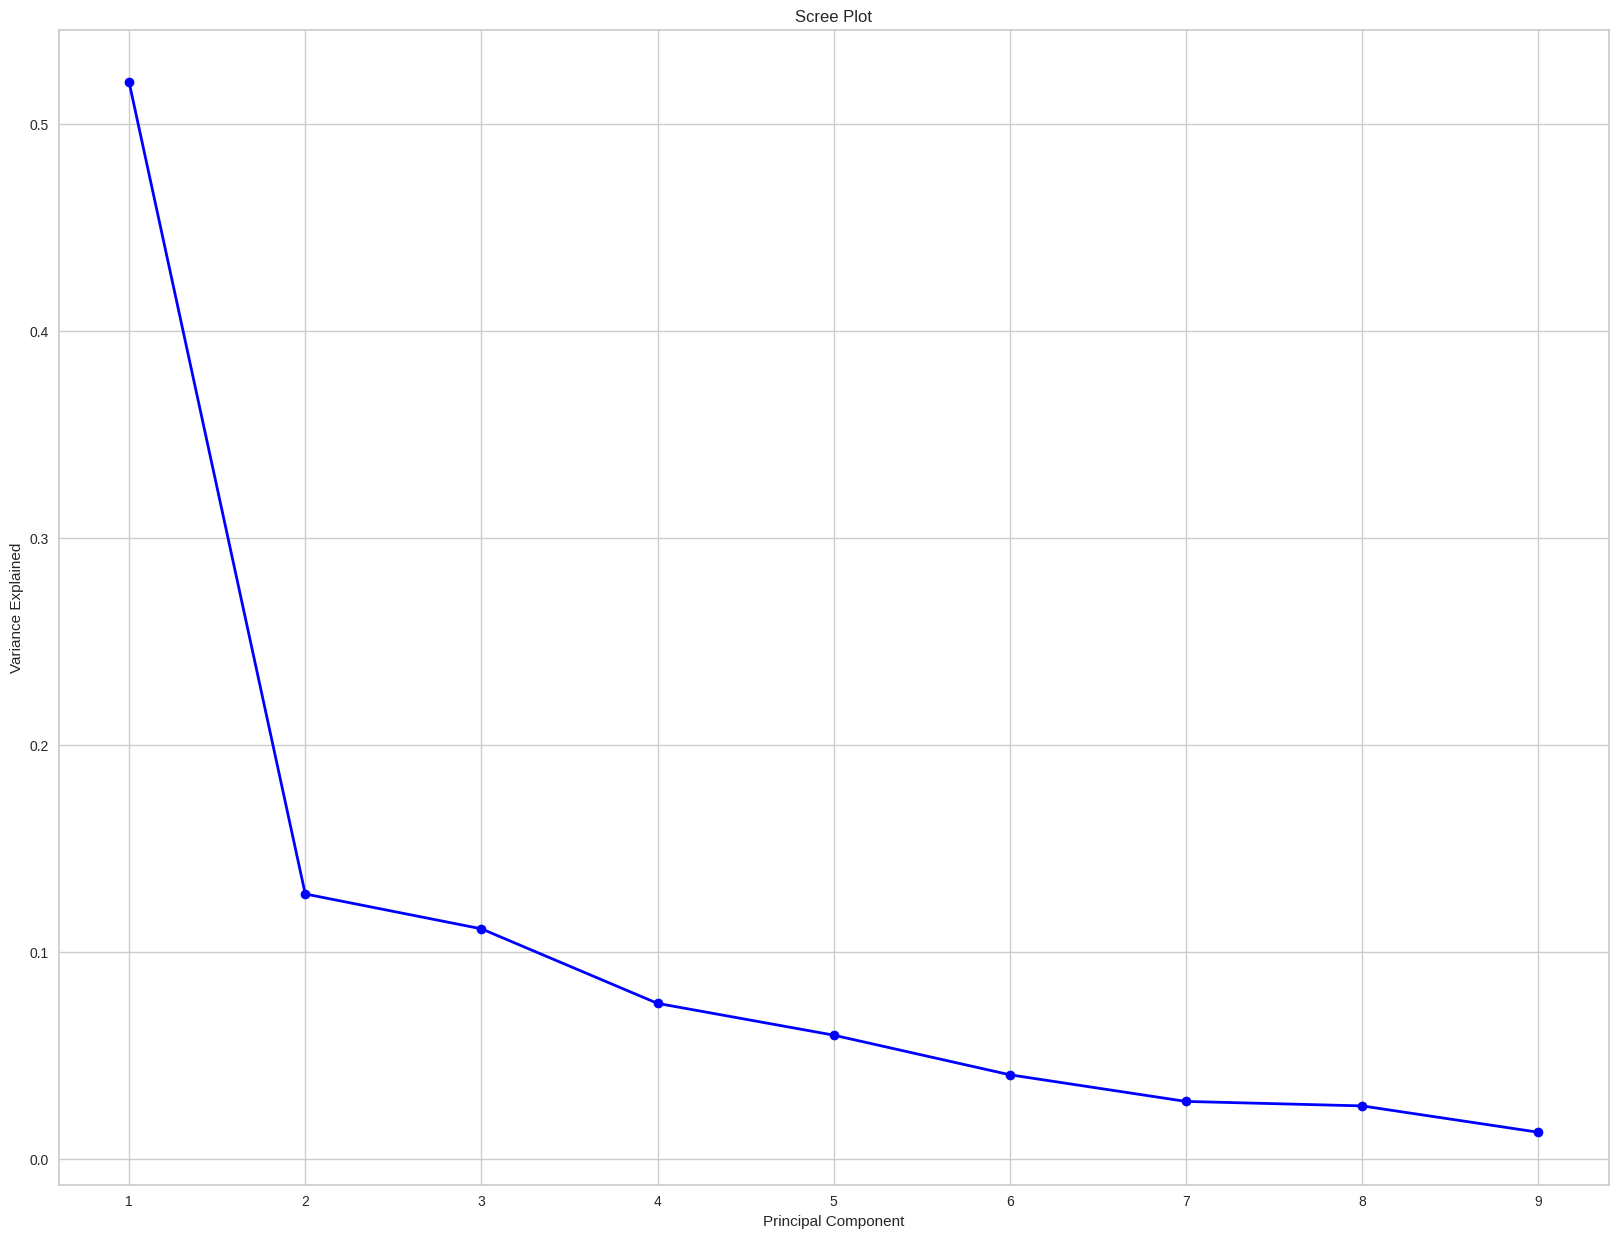

In [112]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/usr/local/lib/python3.10/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



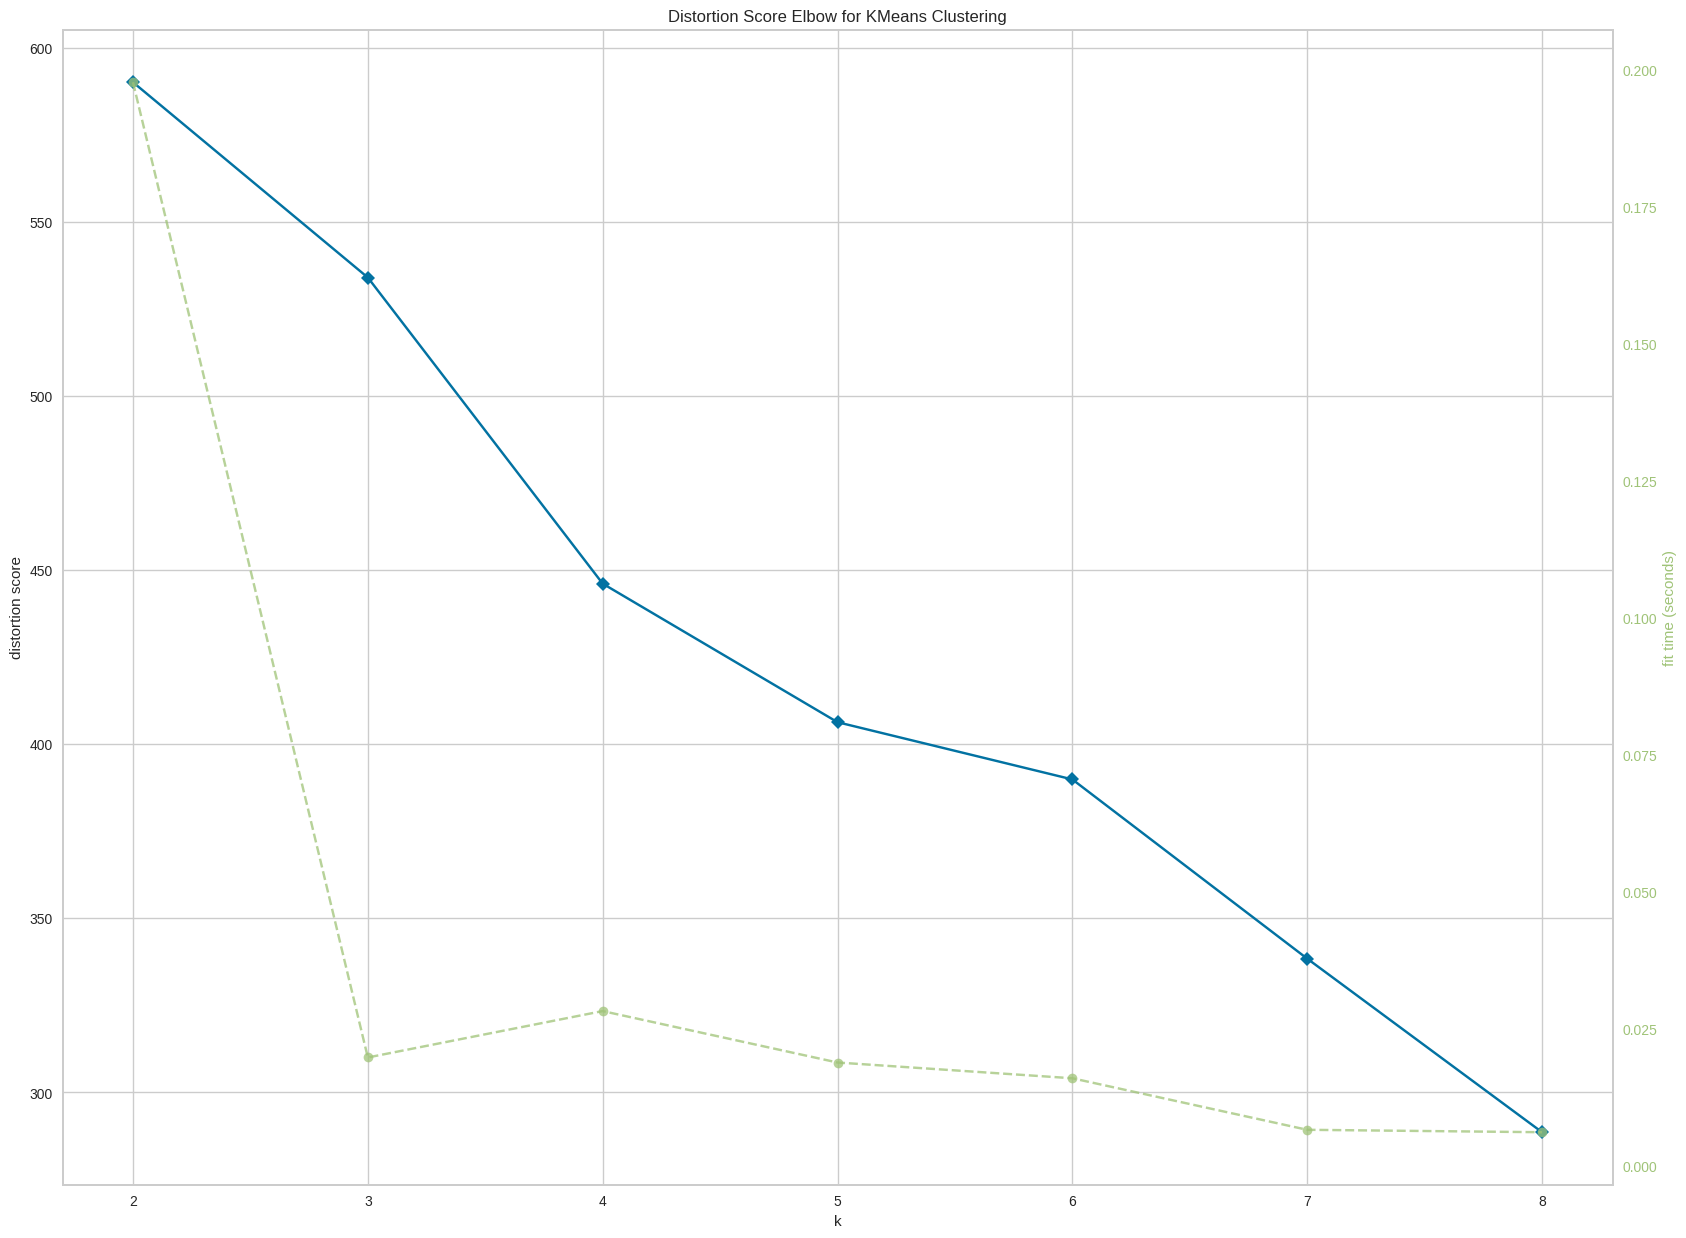

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

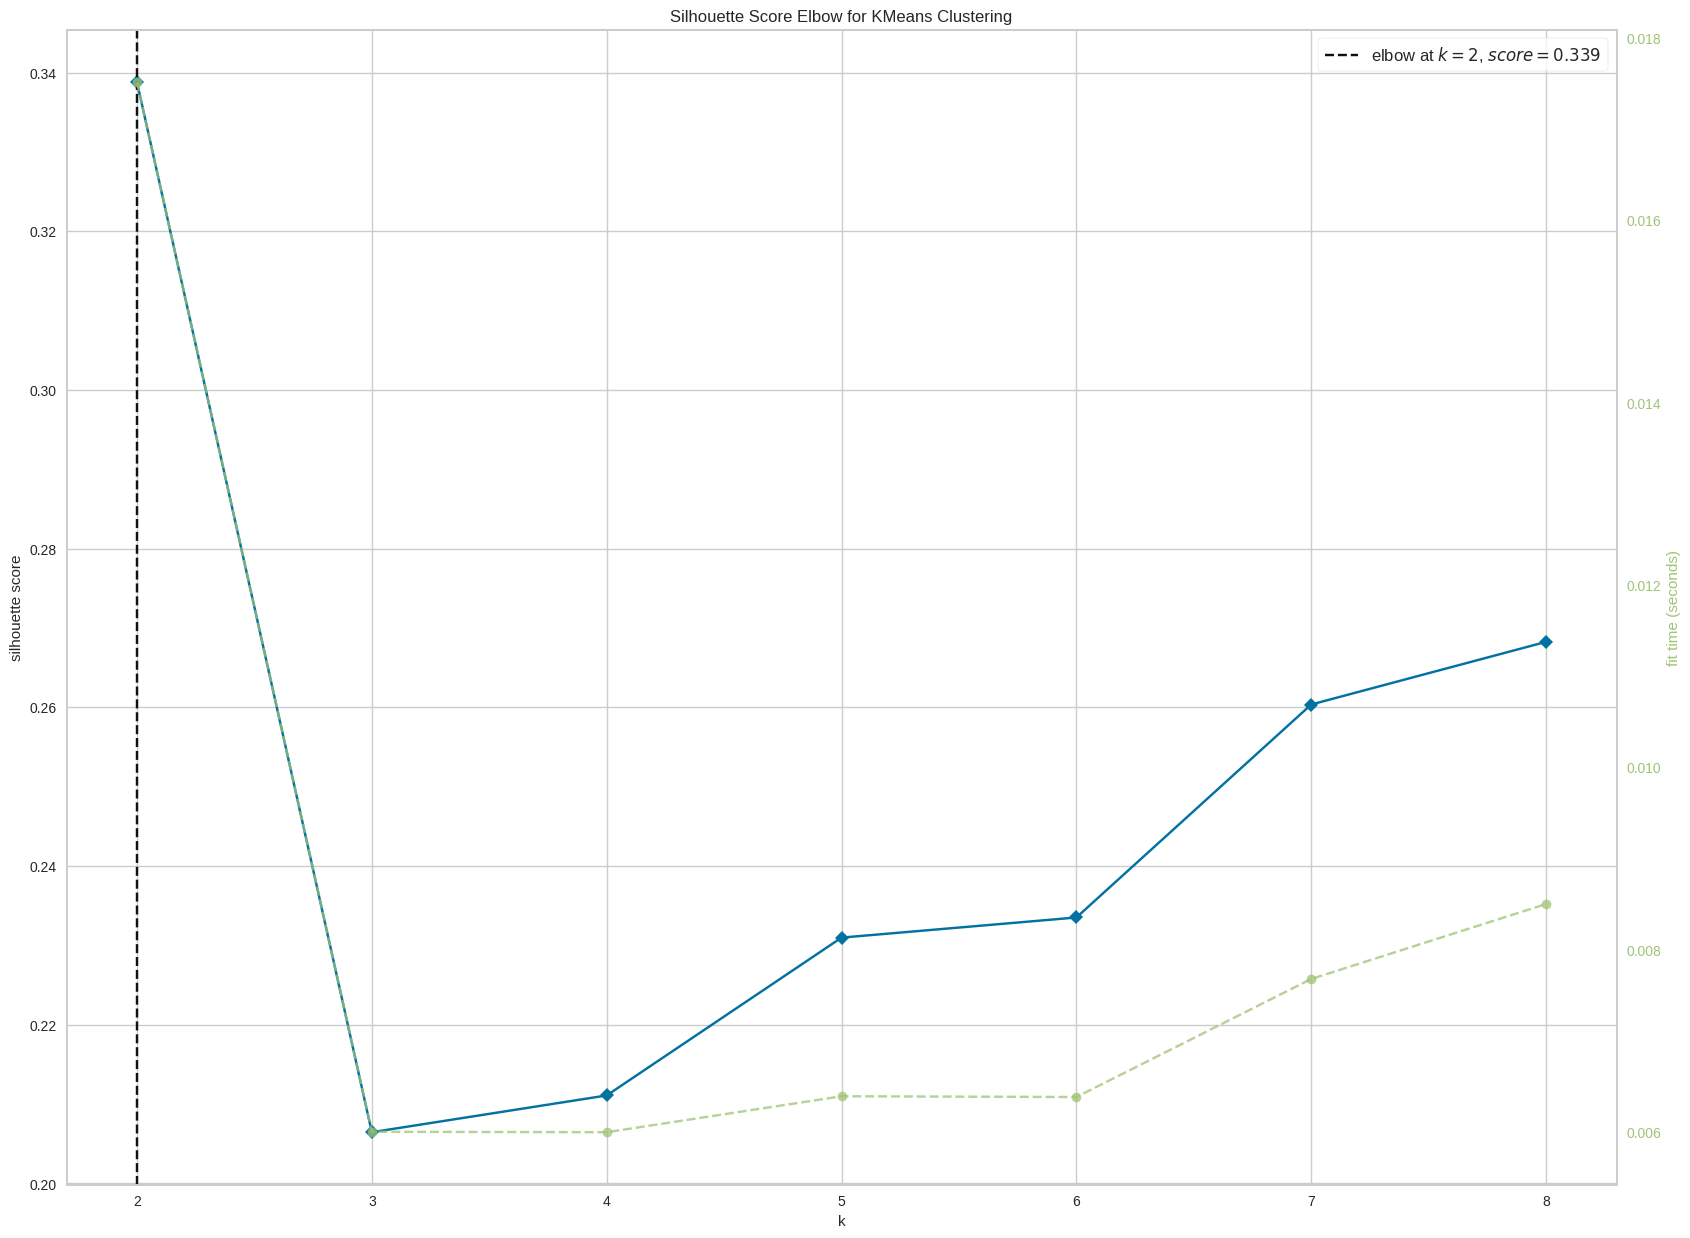

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [114]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

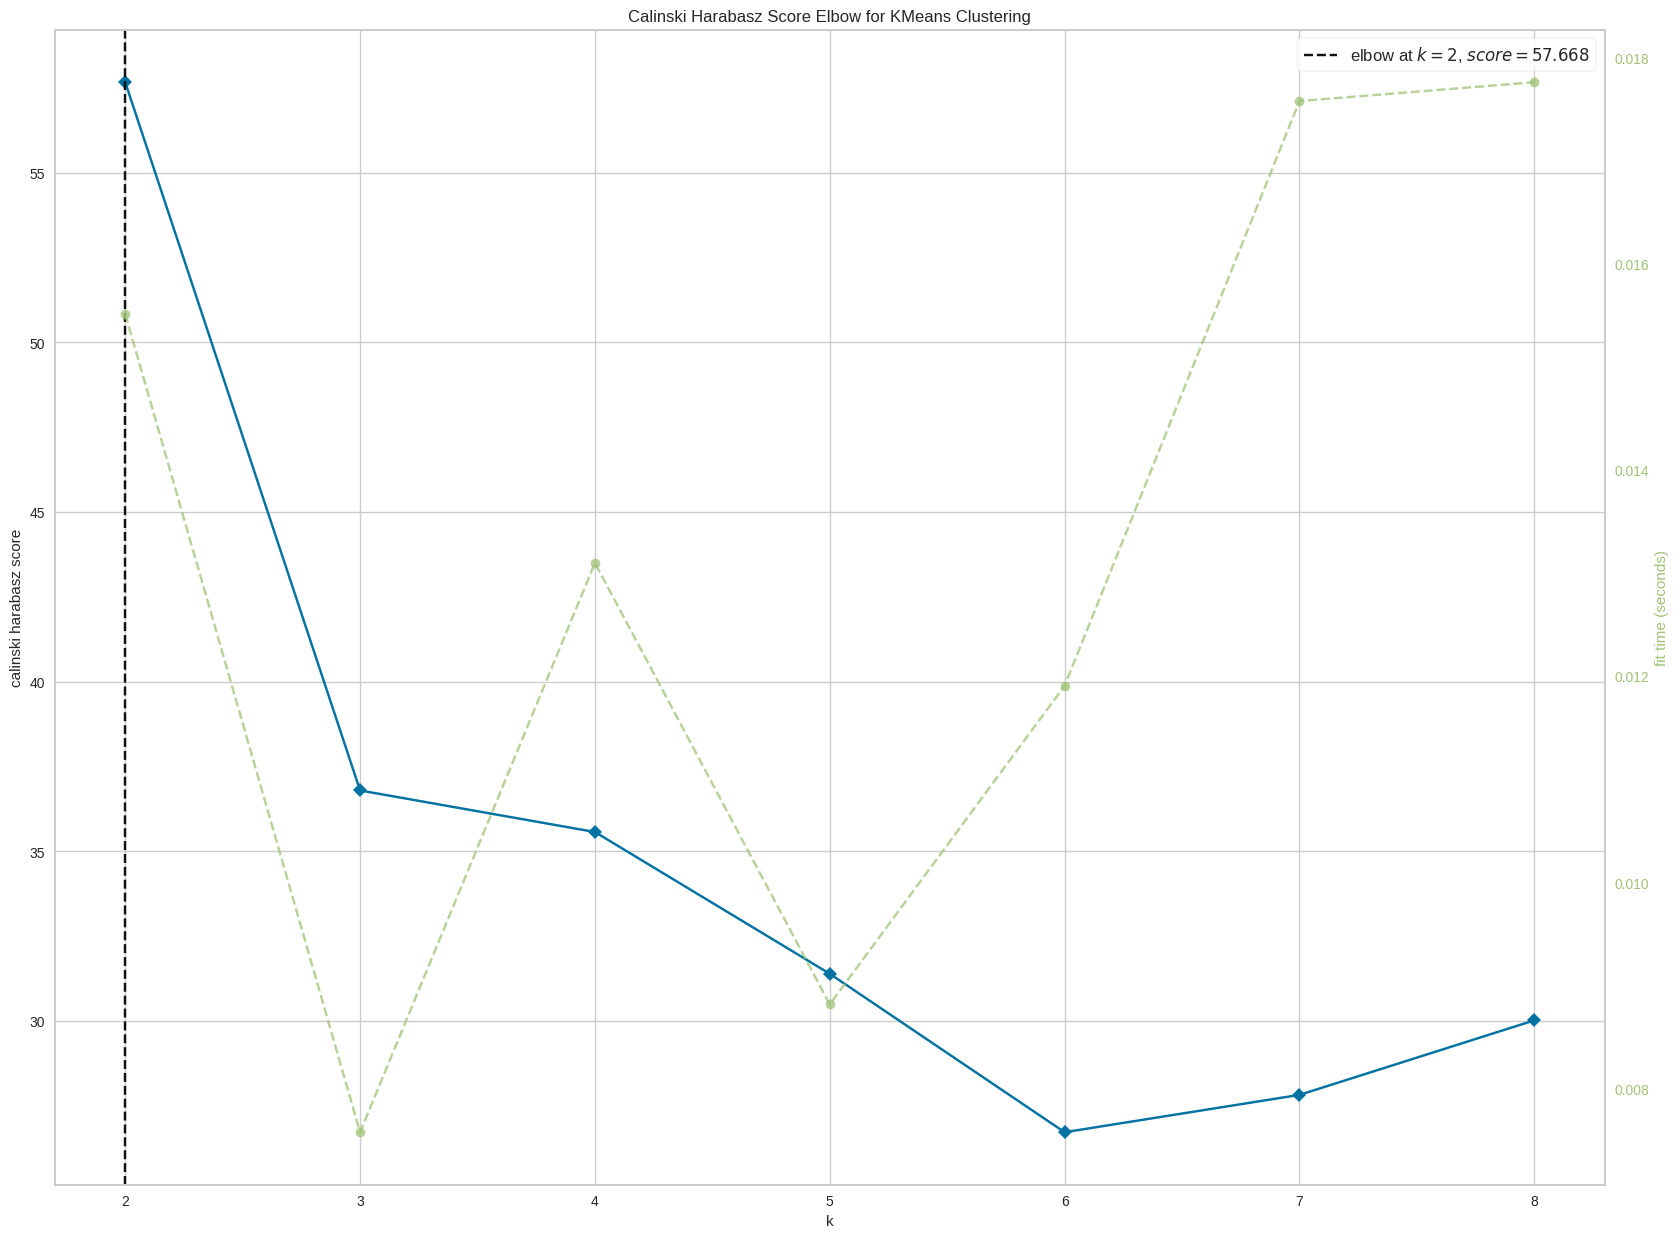

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [115]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [116]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 0 3 0 0 1 0 0 0 3 3 0 0 3 0 0 1 0 0 0 0 3 0 1 1 0 0 3 0 0 3 0 0 3 0 0 0
 0 0 3 1 0 3 0 0 0 0 1 1 0 3 2 0 0 3 0 0 0 0 1 0 3 3 3 0 1 0 3 0 3 0 3 1 3
 0 0 3 0 3 1 0 3 0 0 3 0 3 3 3 0 3 0 0 3 0 0 0 0 0 3 3 3 3]
463.1033440377726
4
[[-1.57068 -0.10693  0.1634  -0.14654 -0.09425  0.05438 -0.02864 -0.05173
   0.01379]
 [ 2.98956 -1.2193   0.36966  0.18174  0.45122  0.06544  0.34427 -0.09945
  -0.15208]
 [ 8.07582 -3.33743  0.30775 -0.81889 -0.13646  2.74877 -0.98525 -0.19267
   1.26431]
 [ 1.4734   0.75533 -0.44439  0.22305  0.00588 -0.20901 -0.0464   0.13708
  -0.00747]]


In [117]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({1: 12, 0: 58, 3: 32, 2: 1})

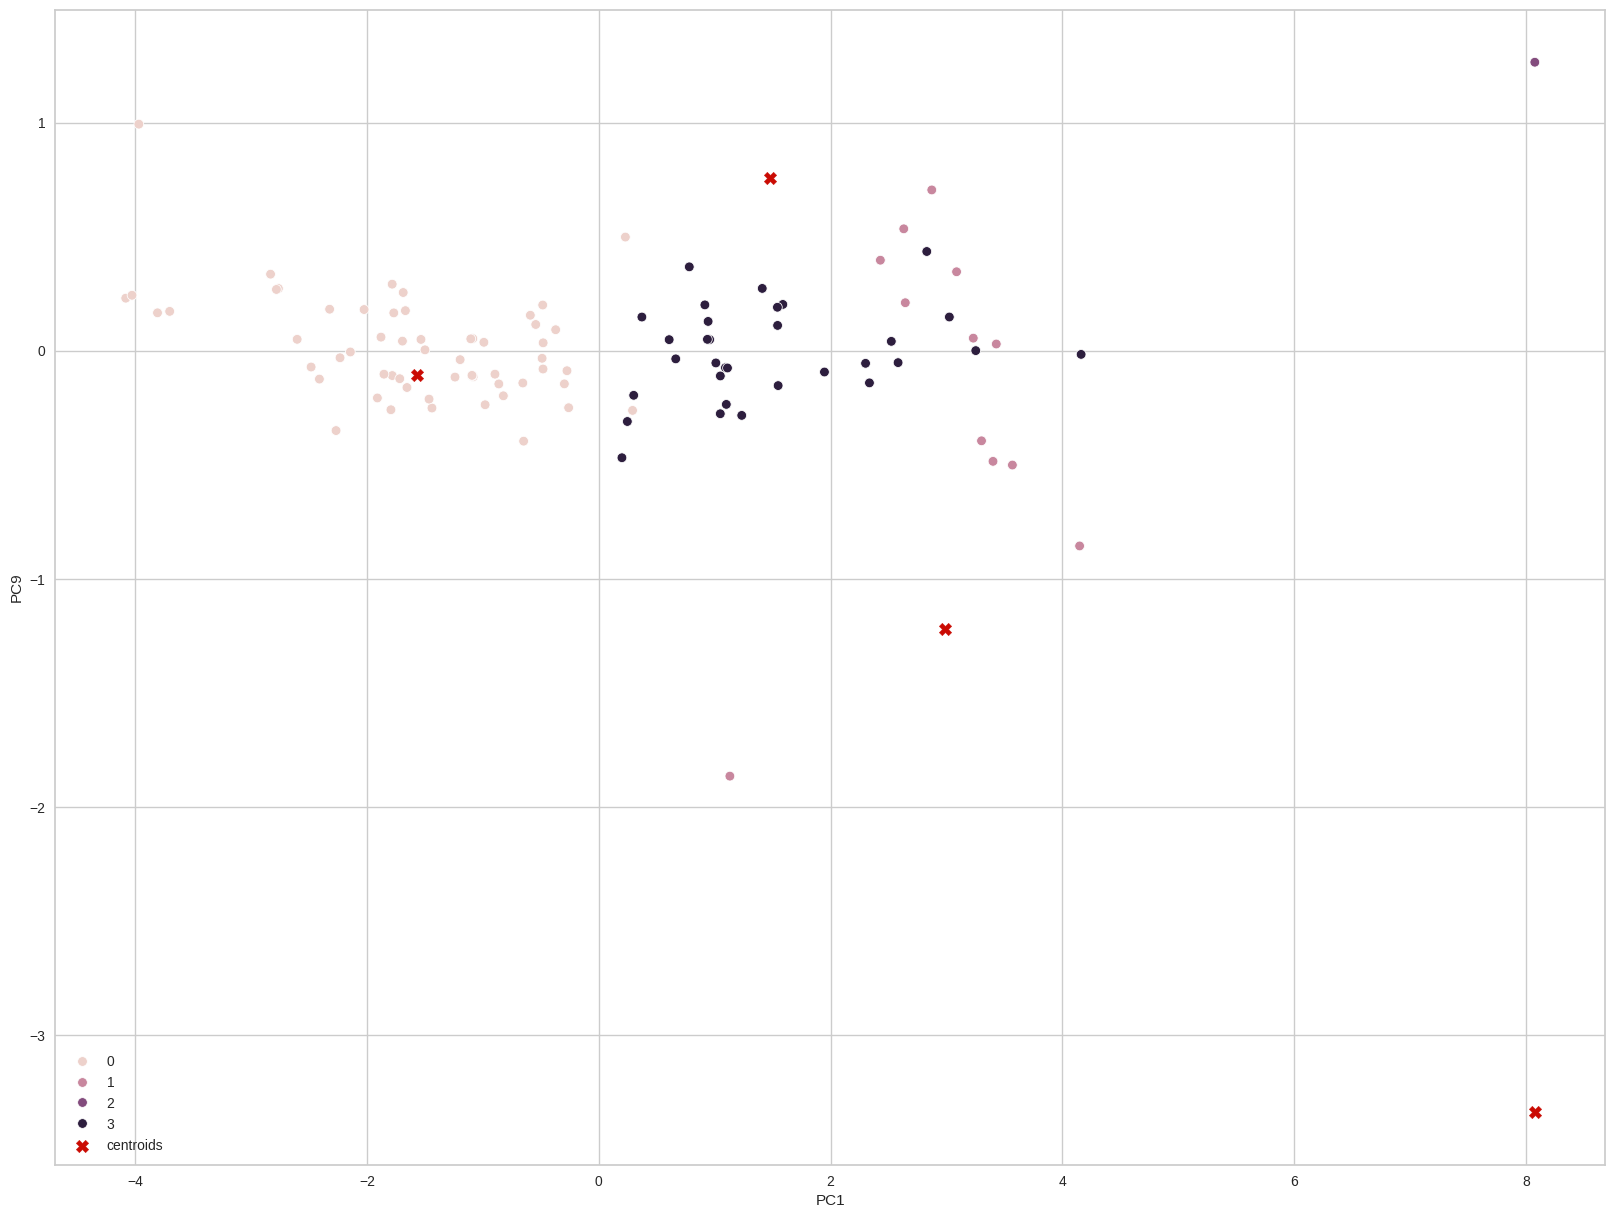

In [119]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

**Regression for data2**

In [120]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df['inr(10e3)']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)


In [122]:
print(lm.intercept_)

4643.522050485437


In [123]:
lm.coef_

array([ 1101.58721,  -741.20904,  -208.53617,   508.32246,   122.3533 ,
        1579.00686,   333.61147, -1079.99512, -1461.72269])

In [124]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1101.5872
PC2,-741.2090
PC3,-208.5362
PC4,508.3225
Pc5,122.3533
PC6,1579.0069
PC7,333.6115
PC8,-1079.9951
PC9,-1461.7227


In [125]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [126]:
y_test

,inr(10e3)
37,3744.0000
1,2496.0000
69,5233.2800
80,3243.7184
92,3064.8384
61,5459.5840
85,2903.6800
53,3328.0000
88,3952.0000
32,2594.5088


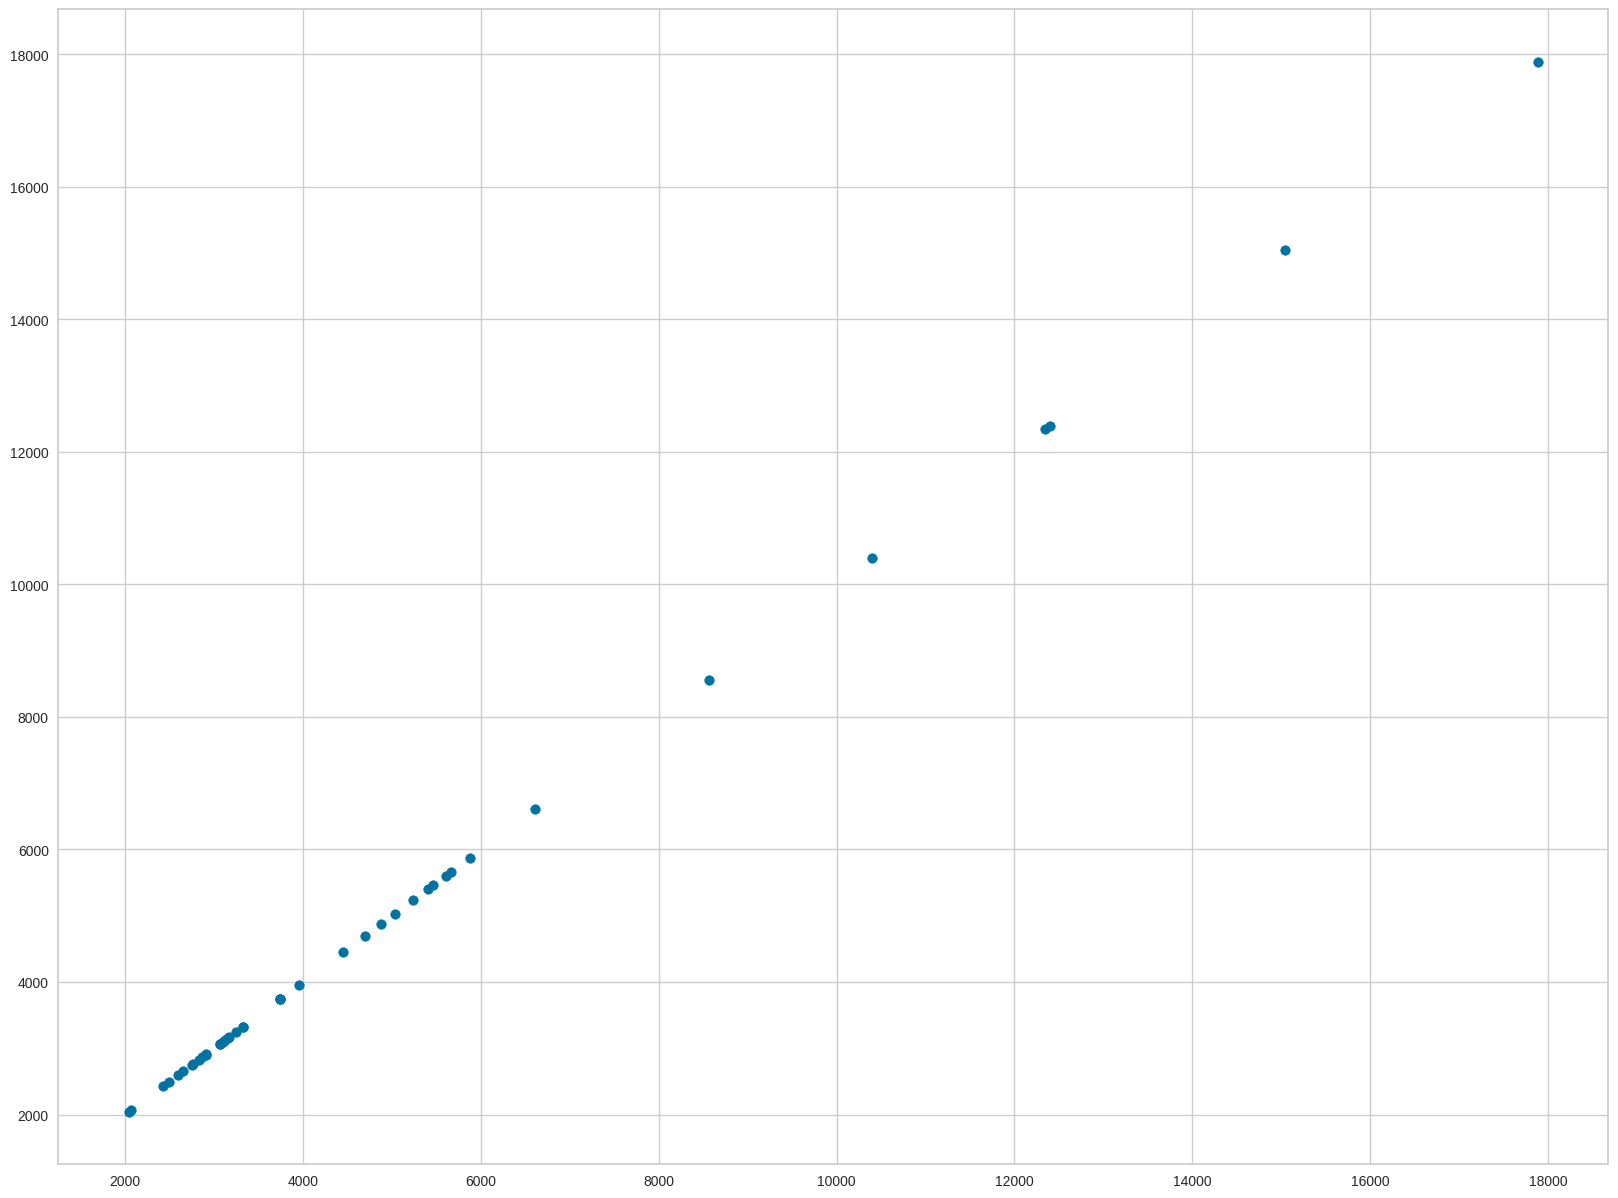

In [127]:
plt.scatter(y_test, predictions)

<ipython-input-129-4c283b31e3cd>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='inr(10e3)', ylabel='Density'>

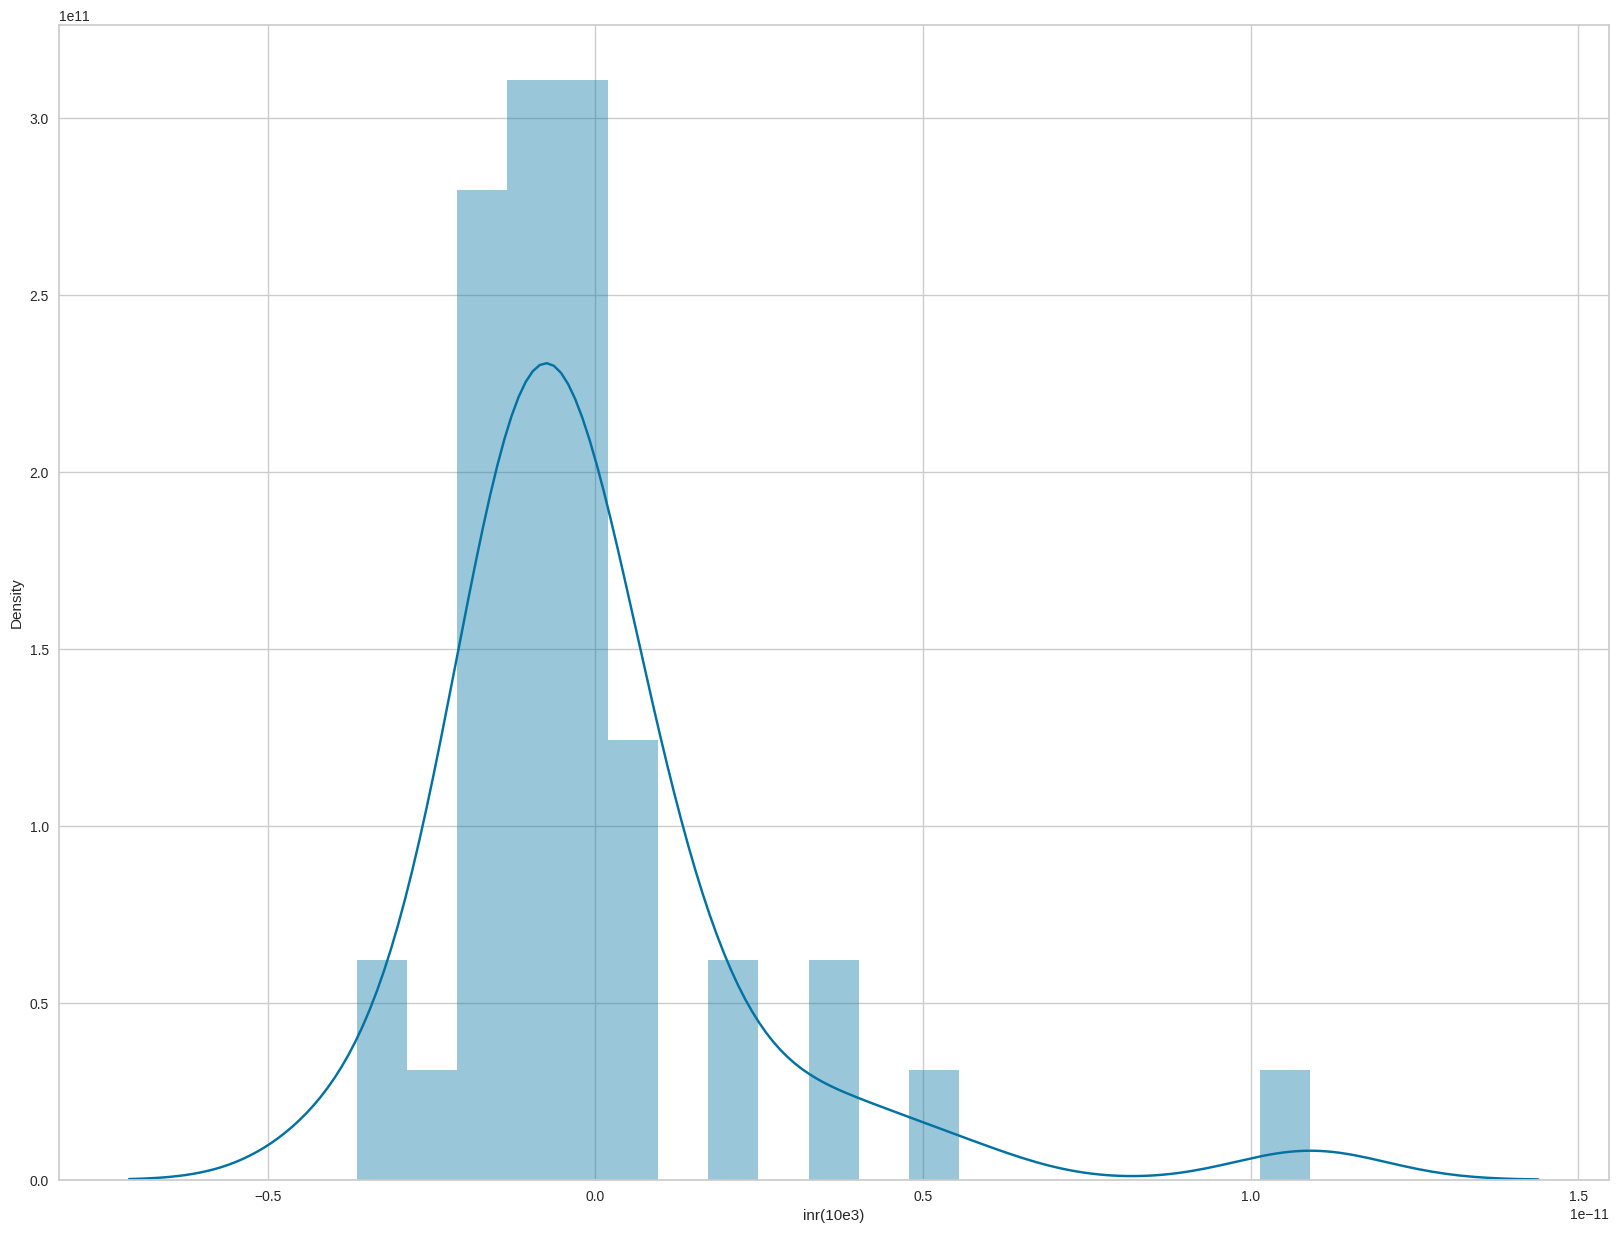

In [129]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [130]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1.5374791387113787e-12
MSE: 5.849348617339267e-24
RMSE: 2.4185426639485332e-12


In [131]:
metrics.mean_absolute_error(y_test,predictions)

1.5374791387113787e-12

In [132]:
metrics.mean_squared_error(y_test,predictions)

5.849348617339267e-24

In [133]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2.4185426639485332e-12